In [ ]:
!pip install git+https://github.com/business-science/ai-data-science-team.git --upgrade
!pip install langchain-cohere
!pip install h2o

  Cloning https://github.com/business-science/ai-data-science-team.git to /tmp/pip-req-build-_pyr7c4b
  Running command git clone --filter=blob:none --quiet https://github.com/business-science/ai-data-science-team.git /tmp/pip-req-build-_pyr7c4b
  Resolved https://github.com/business-science/ai-data-science-team.git to commit 73e374c40fd4a2223aa67606333f63e165bac60f
  Preparing metadata (setup.py) ... done


In [ ]:
from langchain_cohere import ChatCohere
import pandas as pd
import h2o
import os
import yaml

from ai_data_science_team.ml_agents import H2OMLAgent

In [ ]:
MODEL    = "command-a-03-2025"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["COHERE_API_KEY"]="vzSaVSQtzbCOQAjUyvWGOGX86H5mcwKZ2lSIuGGv"
cohere_api_key = os.environ.get('COHERE_API_KEY')

llm = ChatCohere(model = MODEL)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv",   nrows=500)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8205-OTCHB,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.6,Yes
496,4134-BSXLX,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.90,1785.65,No
497,0505-SPOOW,Female,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No
498,6235-VDHOM,Female,1,No,No,5,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,28.45,131.05,Yes


In [ ]:
#from google.colab import files
#files.upload()

from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!kaggle datasets download -d samayashar/fraud-detection-transactions-dataset

!unzip fraud-detection-transactions-dataset.zip

df2 = pd.read_csv('synthetic_fraud_dataset.csv',  nrows=100)
df2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset
License(s): CC0-1.0
fraud-detection-transactions-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fraud-detection-transactions-dataset.zip
replace synthetic_fraud_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TXN_3928,USER_5143,32.32,POS,2023-12-25 22:20:00,35239.44,Tablet,London,Groceries,0,...,12,260.55,1,Amex,93,2716.25,OTP,0.6900,0,0
96,TXN_37286,USER_6868,174.45,POS,2023-12-18 16:19:00,73618.23,Mobile,Sydney,Clothing,0,...,9,386.62,3,Amex,207,4996.91,OTP,0.4651,1,0
97,TXN_25045,USER_8955,109.35,POS,2023-04-04 15:05:00,42365.28,Mobile,London,Restaurants,0,...,4,355.47,1,Discover,103,3099.26,Biometric,0.3890,0,0
98,TXN_15727,USER_9104,22.51,ATM Withdrawal,2023-05-12 15:42:00,1651.62,Tablet,London,Restaurants,0,...,2,470.64,0,Amex,23,205.30,Biometric,0.4306,1,0


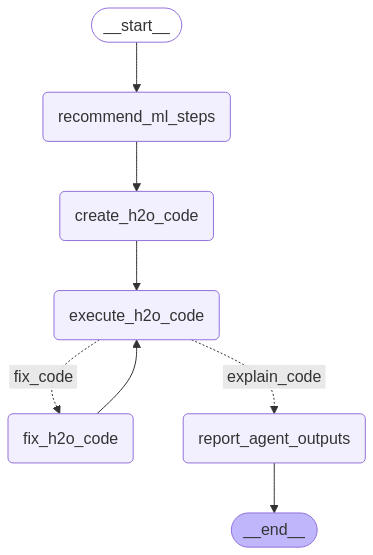

In [ ]:
ml_agent = H2OMLAgent(
    model=llm,
    log=False,
    log_path=LOG_PATH,
    enable_mlflow=False,
)
ml_agent

In [ ]:
df2.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [ ]:
ml_agent.invoke_agent(
    data_raw=df2.drop(columns=["Transaction_ID"]),
    user_instructions="Please do classification on 'Fraud_Label'. Use a max runtime of 300 seconds.",
    target_variable="Fraud_Label"
)

---H2O ML AGENT----
    * RECOMMEND MACHINE LEARNING STEPS
    * CREATE H2O AUTOML CODE
    * EXECUTING AGENT CODE
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
03:22:08.75: Stopping tolerance set by the user is < 70% of the recommended default of 0.05, so models may take a long time to converge or may not converge at all.
03:22:08.80: _train param, Dropping bad and constant columns: [User_ID]
03:22:08.80: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:22:08.80: _stopping_metric param, Stopping metric cannot be AUC for regression.
03:22:08.82: _train param, Dropping bad and constant columns: [User_ID]
03:22:08.82: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead 

ERROR:root:Error occurred during H2O AutoML training: Job with key $03017f00000132d4ffffffff$_b86c1b83417ef7e1c211c6cd4bf247f9 failed with an exception: water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
stacktrace: 
water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
	at ai.h2o.automl.AutoML.learn(AutoML.java:776)
	at ai.h2o.automl.AutoML.run(AutoML.java:494)
	at ai.h2o.automl.H2OJob$1.compute2(H2OJob.java:33)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)

ERROR:root:Fatal error in H2O AutoML: Job with key $03017f00000132d4ffffffff$_b86c1b83417ef7e1c211c6cd4bf247f9 failed with an excep


03:22:19.638: _train param, Dropping bad and constant columns: [User_ID]
03:22:19.638: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:22:19.638: _stopping_metric param, Stopping metric cannot be AUC for regression.
03:22:19.638: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 100.0.
03:22:19.640: _train param, Dropping bad and constant columns: [User_ID]
03:22:19.640: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:22:19.640: _stopping_metric param, Stopping metric cannot be AUC for regression.
03:22:19.641: _train param, Dropping bad and constant columns: [User

ERROR:root:Error occurred during H2O AutoML training: Job with key $03017f00000132d4ffffffff$_8e7a79461123b7407fedb2ea4f834bde failed with an exception: water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
stacktrace: 
water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
	at ai.h2o.automl.AutoML.learn(AutoML.java:776)
	at ai.h2o.automl.AutoML.run(AutoML.java:494)
	at ai.h2o.automl.H2OJob$1.compute2(H2OJob.java:33)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)

ERROR:root:Fatal error in H2O AutoML: Job with key $03017f00000132d4ffffffff$_8e7a79461123b7407fedb2ea4f834bde failed with an excep


03:22:30.845: _train param, Dropping bad and constant columns: [User_ID]
03:22:30.845: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:22:30.845: _stopping_metric param, Stopping metric cannot be AUC for regression.
03:22:30.845: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 100.0.
03:22:30.847: _train param, Dropping bad and constant columns: [User_ID]
03:22:30.847: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:22:30.847: _stopping_metric param, Stopping metric cannot be AUC for regression.
03:22:30.851: _train param, Dropping bad and constant columns: [User

ERROR:root:Error occurred during H2O AutoML training: Job with key $03017f00000132d4ffffffff$_bafcb17d213c46fdec4573cc1c8e4ac7 failed with an exception: water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
stacktrace: 
water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
	at ai.h2o.automl.AutoML.learn(AutoML.java:776)
	at ai.h2o.automl.AutoML.run(AutoML.java:494)
	at ai.h2o.automl.H2OJob$1.compute2(H2OJob.java:33)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)

ERROR:root:Fatal error in H2O AutoML: Job with key $03017f00000132d4ffffffff$_bafcb17d213c46fdec4573cc1c8e4ac7 failed with an excep


03:22:42.223: _train param, Dropping bad and constant columns: [User_ID]
03:22:42.223: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:22:42.223: _stopping_metric param, Stopping metric cannot be AUC for regression.
03:22:42.223: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 100.0.
03:22:42.226: _train param, Dropping bad and constant columns: [User_ID]
03:22:42.226: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:22:42.226: _stopping_metric param, Stopping metric cannot be AUC for regression.
03:22:42.227: _train param, Dropping bad and constant columns: [User

In [ ]:
ml_agent.get_leaderboard()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,GBM_grid_1_AutoML_6_20250317_24819_model_2,0.836715,0.435400,0.607009,0.206569,0.374905,0.140554
1,StackedEnsemble_BestOfFamily_3_AutoML_6_202503...,0.833606,0.422515,0.610552,0.232653,0.369642,0.136635
2,GLM_1_AutoML_6_20250317_24819,0.832903,0.425407,0.598608,0.229839,0.369801,0.136753
3,XGBoost_1_AutoML_6_20250317_24819,0.831884,0.426966,0.616259,0.239961,0.371149,0.137752
4,GBM_1_AutoML_6_20250317_24819,0.831223,0.434293,0.599315,0.229629,0.375625,0.141094
5,StackedEnsemble_BestOfFamily_2_AutoML_6_202503...,0.830950,0.428019,0.603817,0.234123,0.370029,0.136922
6,StackedEnsemble_BestOfFamily_1_AutoML_6_202503...,0.829490,0.429617,0.594224,0.248488,0.371159,0.137759
7,StackedEnsemble_AllModels_1_AutoML_6_20250317_...,0.828934,0.429421,0.585063,0.234837,0.371467,0.137988
8,XGBoost_2_AutoML_6_20250317_24819,0.828356,0.441431,0.601074,0.248152,0.376268,0.141578
9,XGBoost_grid_1_AutoML_6_20250317_24819_model_1,0.826791,0.435389,0.599168,0.238869,0.374061,0.139921


In [ ]:
ml_agent.get_h2o_train_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-03-17 02:48:19

# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-03-17 02:48:10

def h2o_automl(
    data_raw,
    target='Churn',
    max_runtime_secs=60,
    exclude_algos=None,
    balance_classes=False,
    nfolds=5,
    seed=123,
    sort_metric='AUC',
    stopping_metric='AUC',
    stopping_rounds=3,
    include_algos=None,
    model_directory=None,
    log_path='/content/logs/',
    enable_mlflow=False,
    mlflow_tracking_uri=None,
    mlflow_experiment_name='H2O AutoML',
    mlflow_run_name=None,
    **kwargs
):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd
    from contextlib import nullcontext

    # Initialize H2O if not already started
    if not h2o.connection().connected:
        h2o.init()

    # Convert pandas DataFrame to H2OFrame
    data_h2o = h2o.H2OFrame(data_raw)

    # Validate exclude_algos and include_algos
    if exclude_algos is not None and include_algos is not None:
        raise ValueError("Use either `exclude_algos` or `include_algos`, not both.")

    # MLflow setup
    if enable_mlflow:
        import mlflow
        if mlflow_tracking_uri:
            mlflow.set_tracking_uri(mlflow_tracking_uri)
        mlflow.set_experiment(mlflow_experiment_name)
        run_context = mlflow.start_run(run_name=mlflow_run_name)
    else:
        run_context = nullcontext()

    with run_context as run:
        # Train H2O AutoML
        aml = H2OAutoML(
            max_runtime_secs=max_runtime_secs,
            exclude_algos=exclude_algos,
            balance_classes=balance_classes,
            nfolds=nfolds,
            seed=seed,
            sort_metric=sort_metric,
            stopping_metric=stopping_metric,
            stopping_rounds=stopping_rounds,
            include_algos=include_algos,
            **kwargs
        )

        x = [col for col in data_h2o.columns if col != target]
        y = target
        aml.train(x=x, y=y, training_frame=data_h2o)

        # Save model
        model_path = None
        if model_directory or log_path:
            save_path = model_directory if model_directory else log_path
            model_path = h2o.save_model(model=aml.leader, path=save_path, force=True)

        # Prepare results
        leaderboard_df = pd.DataFrame(aml.leaderboard.as_data_frame())
        leaderboard_dict = leaderboard_df.to_dict(orient='list')

        top_metrics = leaderboard_df.iloc[0].to_dict()

        model_results = {
            'model_flavor': 'H2O AutoML',
            'model_path': model_path,
            'best_model_id': aml.leader.model_id,
            'metrics': top_metrics
        }

        # MLflow logging
        if enable_mlflow and run is not None:
            numeric_metrics = {k: v for k, v in top_metrics.items() if isinstance(v, (int, float))}
            mlflow.log_metrics(numeric_metrics)
            if model_path:
                mlflow.h2o.log_model(aml.leader, artifact_path="model")
            mlflow.log_dict(leaderboard_dict, "leaderboard.json")
            mlflow.log_params({
                'target': target,
                'max_runtime_secs': max_runtime_secs,
                'exclude_algos': str(exclude_algos),
                'balance_classes': balance_classes,
                'nfolds': nfolds,
                'seed': seed,
                'sort_metric': sort_metric,
                'stopping_metric': stopping_metric,
                'stopping_rounds': stopping_rounds,
                'include_algos': str(include_algos),
                'model_directory': model_directory,
                'log_path': log_path
            })

        output = {
            'leaderboard': leaderboard_dict,
            'best_model_id': aml.leader.model_id,
            'model_path': model_path,
            'model_results': model_results
        }

        return output
```

In [ ]:
ml_agent.get_recommended_ml_steps(markdown=True)

# Recommended ML Steps:
Here’s a concise list of steps and considerations for performing H2O AutoML on the provided dataset, focusing on maximizing model accuracy while adhering to user instructions and dataset specifics:

1. **Specify the Target Column and Predictors**:
   - Set `y = 'Churn'` as the target column for classification.
   - Exclude `Churn` from the predictor columns (`x`) if not automatically handled by H2O.

2. **Set Maximum Runtime**:
   - Use `max_runtime_secs = 60` as per user instructions.

3. **Exclude Deep Learning Algorithms**:
   - Use `exclude_algos = ['DeepLearning']` to exclude Deep Learning models, as they are typically low-performing and resource-intensive.

4. **Optimize for Classification**:
   - Set `sort_metric = 'AUC'` to prioritize models with the highest AUC (Area Under the ROC Curve), which is a robust metric for binary classification.

5. **Enable Early Stopping**:
   - Use `stopping_metric = 'AUC'` and `stopping_rounds = 3` to stop training if AUC does not improve for 3 consecutive rounds, balancing accuracy and runtime.

6. **Balance Class Imbalance (Optional)**:
   - If `Churn` is imbalanced, consider `balance_classes = True` to oversample the minority class. However, this increases dataset size, so monitor memory usage.

7. **Cross-Validation**:
   - Use `nfolds = 5` for robust model evaluation. Avoid `nfolds = 0` unless a validation frame is provided.

8. **Seed for Reproducibility**:
   - Set `seed = 123` (or any fixed integer) to ensure reproducibility of results.

9. **Include Key Algorithms**:
   - Ensure `include_algos = ['XGBoost', 'GBM', 'DRF', 'GLM']` to focus on high-performing algorithms for tabular data.

10. **Monitor Training Progress**:
    - Use `verbosity = 'info'` to get detailed logs during training, helping debug or optimize further.

**Example Code Snippet**:
```python
aml = H2OAutoML(
    max_runtime_secs=60,
    exclude_algos=['DeepLearning'],
    sort_metric='AUC',
    stopping_metric='AUC',
    stopping_rounds=3,
    nfolds=5,
    seed=123,
    include_algos=['XGBoost', 'GBM', 'DRF', 'GLM'],
    verbosity='info'
)
aml.train(x=x, y='Churn', training_frame=train)
```

These steps ensure the AutoML process is optimized for accuracy, adheres to user constraints, and leverages the strengths of H2O’s algorithms for classification tasks.

In [ ]:
ml_agent.get_best_model_id()

'GBM_grid_1_AutoML_6_20250317_24819_model_2'

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,51 mins 46 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_1nvkwu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.159 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
model = h2o.get_model(ml_agent.get_best_model_id())

model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_6_20250317_24819_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    27                 27                          2764                   1            3            2.11111       2             4             3.51852

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.13031730775467681
RMSE: 0.3609948860505877
LogLoss: 0.409706978184944
Mean Per-Class Error: 0.1975806451612903
AUC: 0.8675865255376344
AUCPR: 0.6632864912991857
Gini: 0.7351730510752688

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.376212060711002
       No    Yes    Error    Rate
-----  ----  -----  -------  ------------
No     318   54     0.1452   (54.0/372.0)
Yes    32    96     0.25     (32.0/128.0)
Total  350   150    0.172    (86.0/500.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.376212     0.690647  127
max f2                       0.209367     0.775296  209
max f0point5                 0.42318      0.675     98
max accuracy                 0.42318      0.832     98
max precision                0.597132     0.875     13
max recall                   0.0534062    1         384
max specificity              0.635114     0.997312  0
max absolute_mcc             0.376212     0.576018  127
max min_per_class_accuracy   0.326828     0.789062  148
max mean_per_class_accuracy  0.376212     0.802419  127
max tns                      0.635114     371       0
max fns                      0.635114     128       0
max fps                      0.046729     372       399
max tps                      0.0534062    128       384
max tnr                      0.635114     0.997312  0
max fnr                      0.635114     1         0
max fpr                      0.046729     1         399
max tpr                      0.0534062    1         384

Gains/Lift Table: Avg response rate: 25.60 %, avg score: 25.69 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.622948           2.34375   2.34375            0.6              0.629146   0.6                         0.629146            0.0234375       0.0234375                  134.375   134.375            0.0180612
2        0.02                        0.612533           3.90625   3.125              1                0.618564   0.8                         0.623855            0.0390625       0.0625                     290.625   212.5              0.0571237
3        0.03                        0.597334           3.90625   3.38542            1                0.608264   0.866667                    0.618658            0.0390625       0.101562                   290.625   238.542            0.0961862
4        0.04                        0.588937           0.78125   2.73437            0.2              0.593527   0.7                         0.612375            0.0078125       0.109375                   -21.875   173.437            0.093246
5        0.05                        0.581894           3.90625   2.96875            1                0.585947   0.76                        

In [ ]:
model.predict(h2o.H2OFrame(df))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.490444,0.509556
No,0.902647,0.0973531
Yes,0.596885,0.403115
No,0.937284,0.0627159
Yes,0.37351,0.62649
Yes,0.411215,0.588785
No,0.67483,0.32517
Yes,0.608504,0.391496
No,0.71186,0.28814
No,0.899479,0.100521


In [ ]:
model.accuracy(h2o.H2OFrame(df))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


[[0.635113656904887, 0.742],
 [0.6288187561419125, 0.742],
 [0.6264903714483976, 0.746],
 [0.6229119126354081, 0.748],
 [0.6221347549428076, 0.75],
 [0.621276598115114, 0.752],
 [0.613623860678363, 0.754],
 [0.6128742052026913, 0.756],
 [0.6125258076207192, 0.758],
 [0.6105077395398418, 0.76],
 [0.6103433879097421, 0.762],
 [0.6040530003252531, 0.764],
 [0.6038876922099906, 0.766],
 [0.5971317291754931, 0.768],
 [0.5926254020538331, 0.76],
 [0.5887847530724918, 0.762],
 [0.5883681657531893, 0.764],
 [0.5847409920833456, 0.766],
 [0.5841215167613444, 0.768],
 [0.5837209473559059, 0.77],
 [0.5817978552728638, 0.768],
 [0.5815147859431844, 0.77],
 [0.5812980203822523, 0.772],
 [0.5793357623036237, 0.774],
 [0.5791710286380474, 0.776],
 [0.5753343331036547, 0.778],
 [0.5725605655255617, 0.78],
 [0.5655019598034148, 0.782],
 [0.5647251599478844, 0.784],
 [0.5562777163252312, 0.786],
 [0.5543773501796546, 0.784],
 [0.5519738164269795, 0.786],
 [0.5518057543338241, 0.788],
 [0.544178085024097